In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import alphalens
import warnings
warnings.filterwarnings('ignore')

In [2]:
position= pd.read_csv('持仓.csv')
basic = pd.read_csv('基本信息.csv')
nav = pd.read_csv('净值.csv')
business_day= pd.read_csv('偏股混合型基金指数.csv') #辅助输入交易日序列
stock_industry=pd.read_csv('行业历史映射.csv')

In [3]:
#输出需要的交易日序列
business_day['date']=business_day['date'].astype('datetime64[ns]')
business1=pd.DataFrame(business_day['date'])  #辅助输入交易日序
business2=business1[(business1['date']>='2016-01-01')&(business1['date']<='2022-12-31')]

In [4]:
#筛选出主动偏股型基金
basic=basic[(basic['是否初始基金']==1)&(basic['status_o']==101001000)&(basic['grading_flg']=='非分级基金')] #筛选出初始基金、未停盘、非分级基金
basic1=basic[basic['investtype2'].isin(['普通股票型基金','偏股混合型基金'])]#筛选出主动偏股型公募基金
fund=basic1[['fund_code']]
fund_list=fund['fund_code'].tolist()

In [5]:
#净值
nav=nav.rename(columns={'sid':'fund_code'})
nav=nav[['date','fund_code','adjnav']]
adjnav= pd.merge(fund,nav,how='inner',on='fund_code')  #筛选主动股票基金的净值和行业
adjnav.drop_duplicates(subset=['date','fund_code'],keep='first',inplace=True)
adjnav=adjnav.reset_index().set_index(['date','fund_code']).unstack()['adjnav']

In [25]:
#胜利因子
adjnav.index=adjnav.index.astype('datetime64[ns]')
high_month_1=adjnav.resample('M').max()  #输出每个月净值的max
t=48
high_month_pct=(high_month_1-high_month_1.rolling(t).mean())/high_month_1.rolling(t).mean()
#high_month_pct=high_month_1.pct_change()  #构造胜利因子，月度调仓
high_month_pct_1=high_month_pct.resample('D').ffill()
high_month_pct_2=pd.merge(high_month_pct_1,business2,how='inner',on='date')

In [26]:
high_month_pct_3=high_month_pct_2.set_index('date')
factor=high_month_pct_3.stack()

In [27]:
######################################################################################生成 price 表
columns_list=high_month_pct.columns.values   
columns_list_1=pd.DataFrame(columns_list)
adjnav_2=adjnav.reset_index()
adjnav_3=pd.merge(adjnav_2,business2,how='inner',on='date')
adjnav_3=adjnav_3.set_index('date')
adjnav_4=adjnav_3[columns_list] 
adjnav_4.index=adjnav_4.index.astype('datetime64[ns]')

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.505438,0.316202,-0.075568,0.174320,46003,5.087854
2,-0.359510,0.423883,0.031297,0.180997,45221,5.001366
3,-0.317664,0.496598,0.078991,0.189089,44955,4.971947
4,-0.293335,0.551280,0.112450,0.195431,45406,5.021827
5,-0.259706,0.593579,0.140898,0.201332,45095,4.987431
6,-0.244445,0.641209,0.166381,0.207393,44897,4.965532
7,-0.233498,0.673049,0.189292,0.213572,45233,5.002693
8,-0.223081,0.711325,0.211131,0.217564,45301,5.010214
9,-0.203021,0.739793,0.232758,0.222295,44911,4.967080


Returns Analysis


,1D
Ann. alpha,-0.020
beta,0.731
Mean Period Wise Return Top Quantile (bps),4.738
Mean Period Wise Return Bottom Quantile (bps),2.539
Mean Period Wise Spread (bps),2.200


<Figure size 640x480 with 0 Axes>

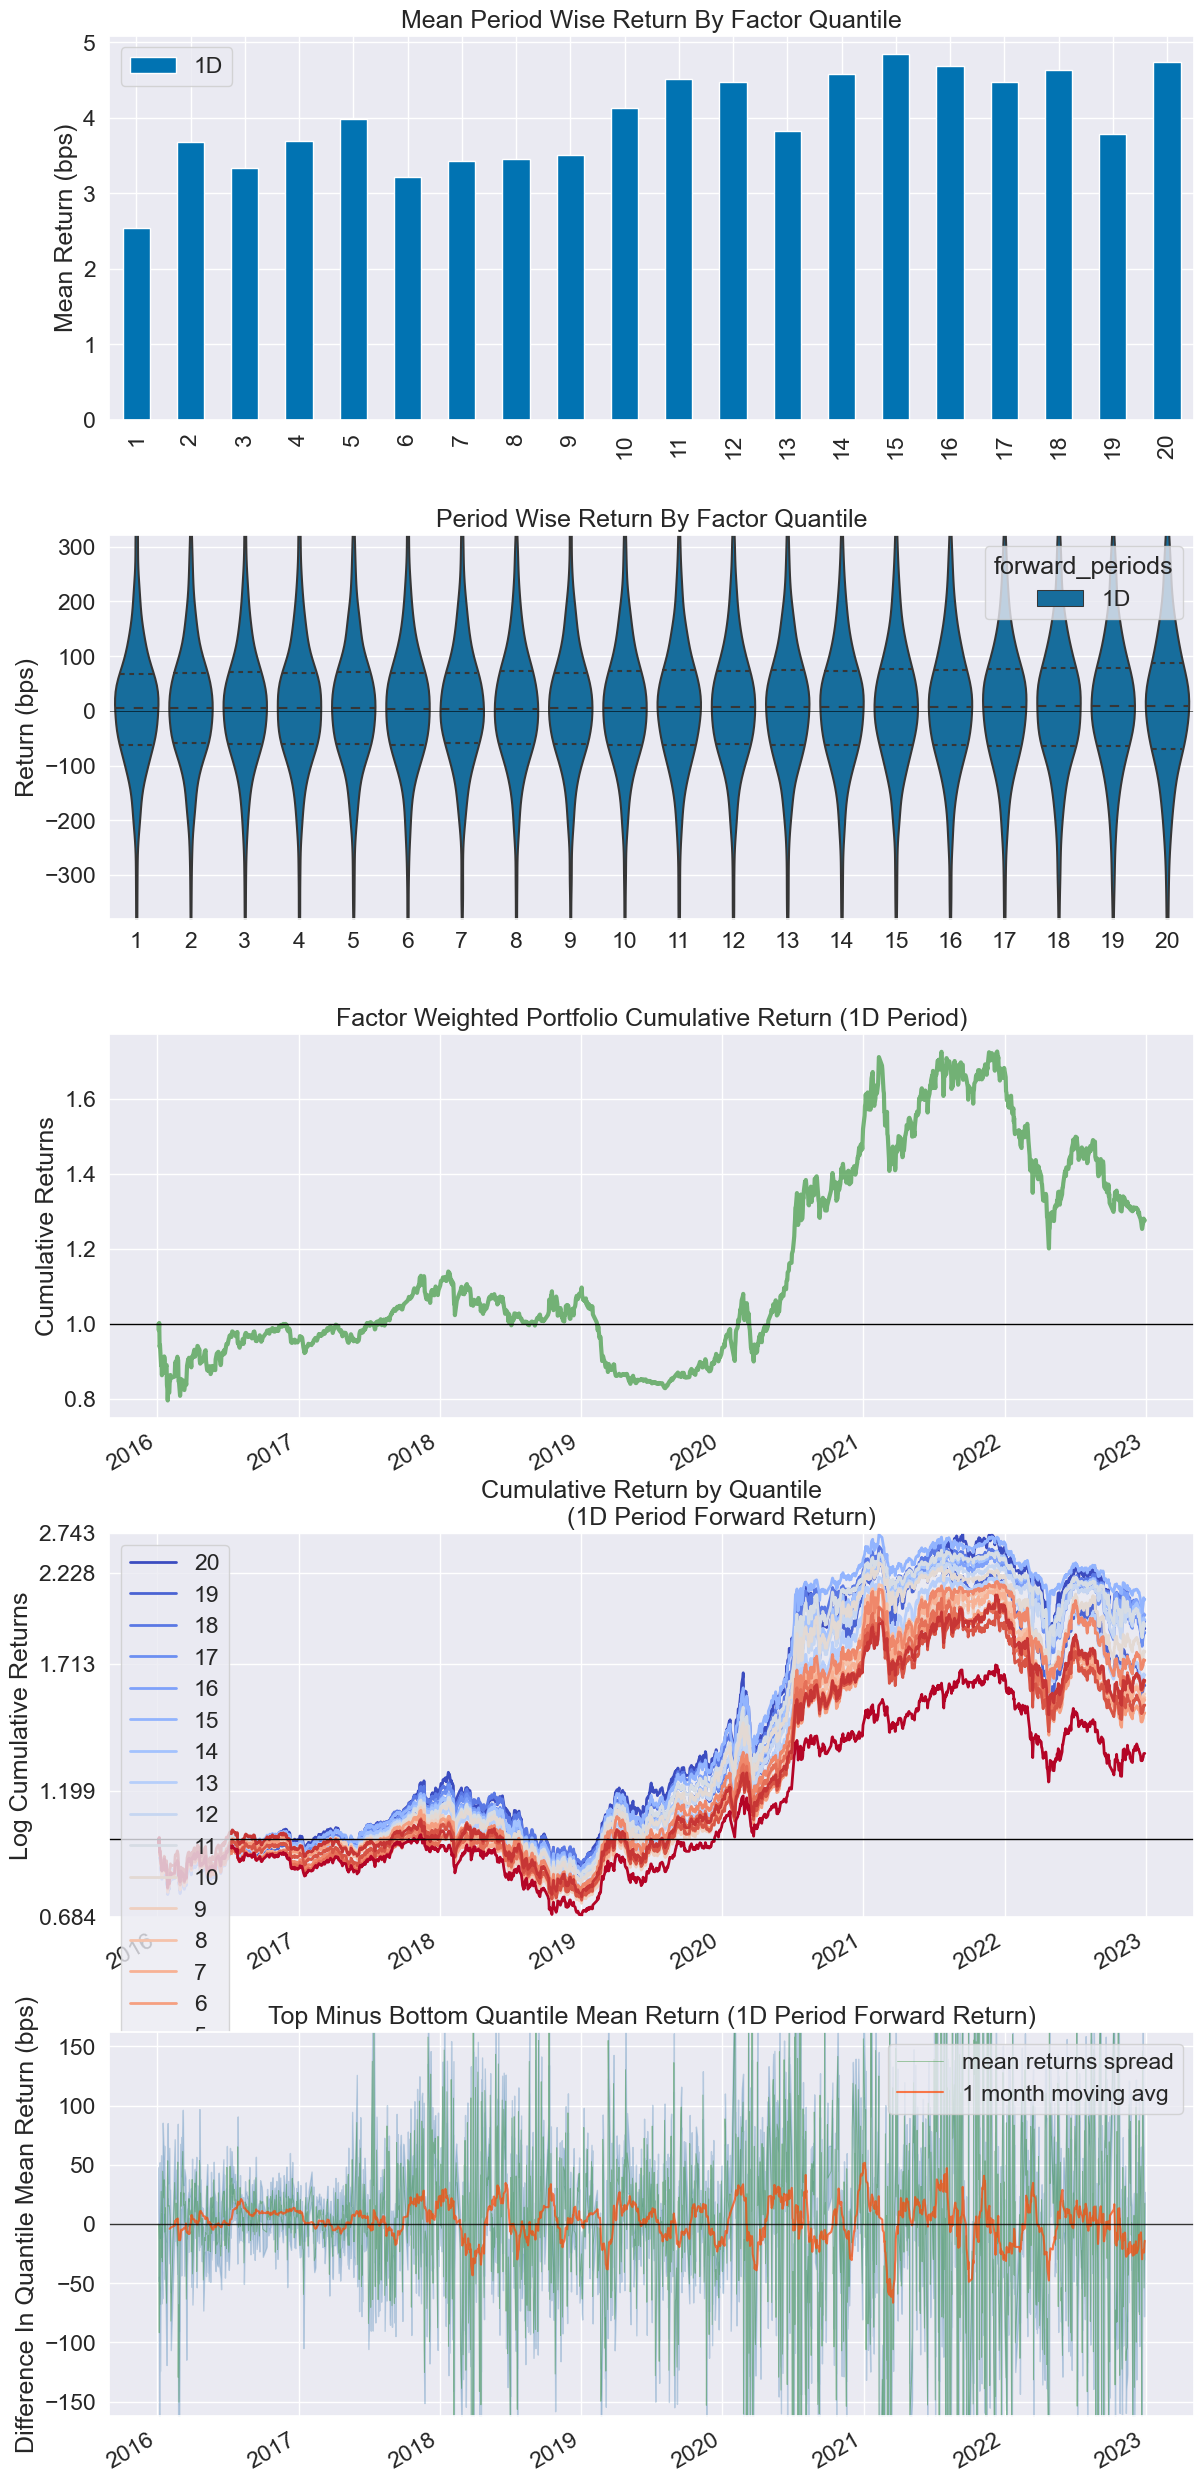

Information Analysis


,1D
IC Mean,0.015
IC Std.,0.187
Risk-Adjusted IC,0.081
t-stat(IC),3.347
p-value(IC),0.001
IC Skew,-0.185
IC Kurtosis,-0.350


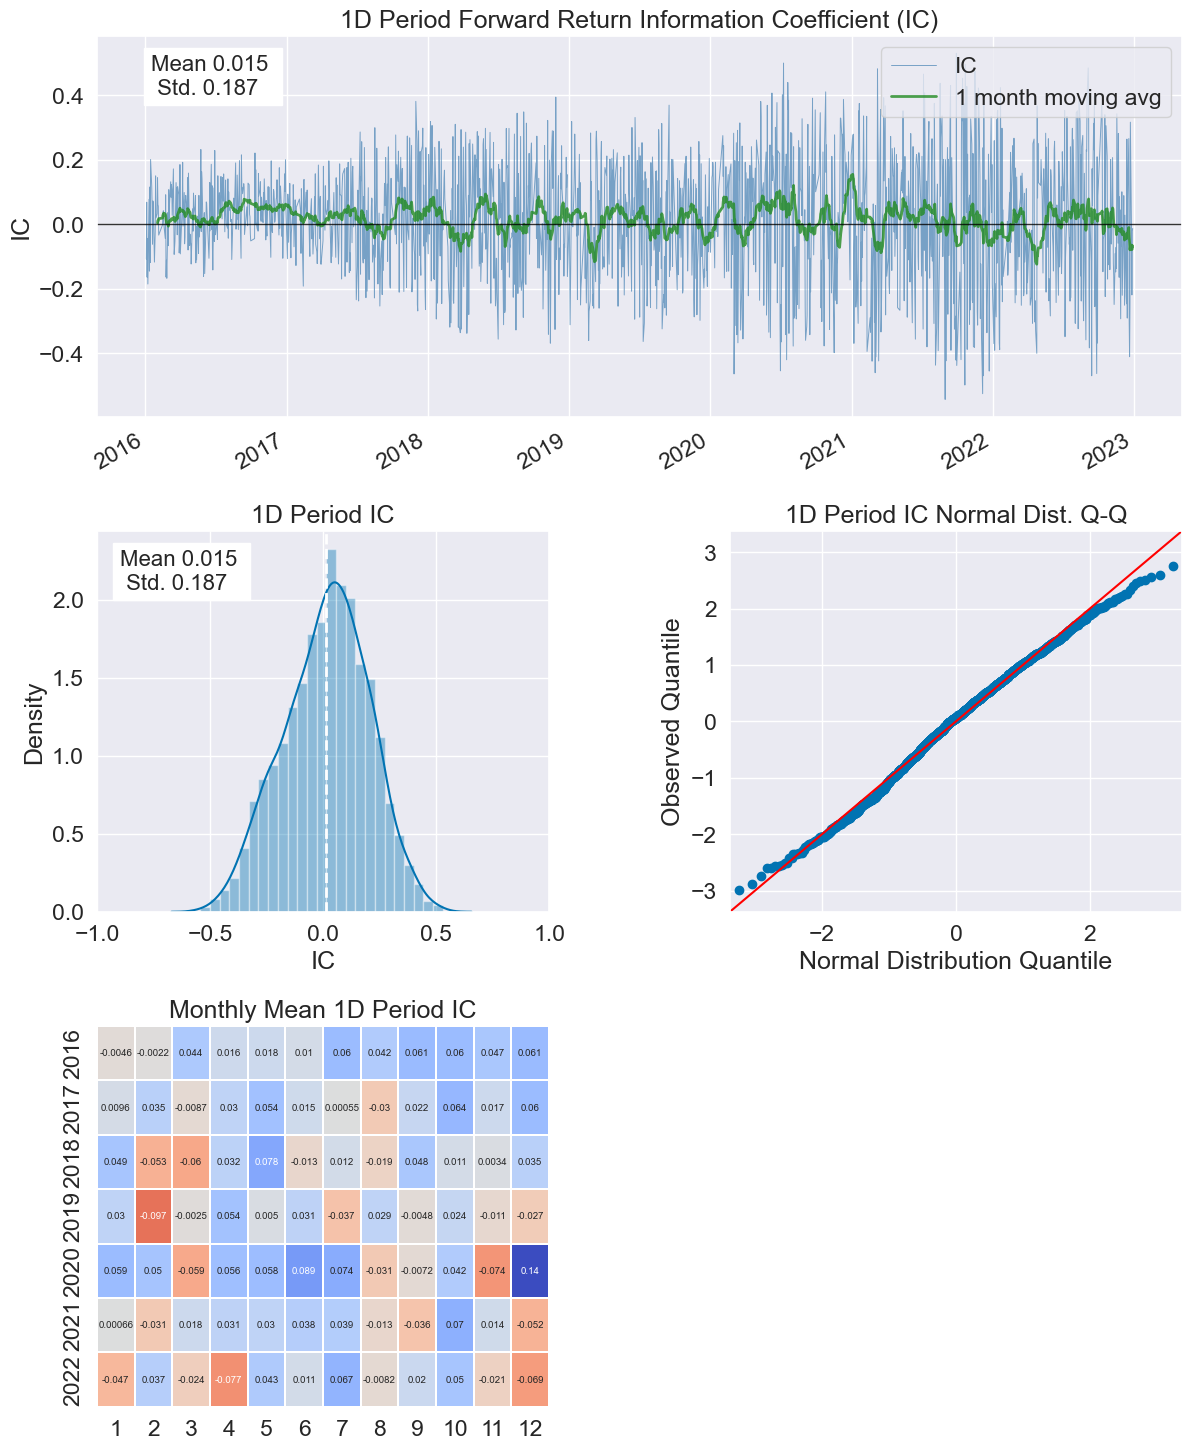

Turnover Analysis


,1D
Quantile 1 Mean Turnover,0.009
Quantile 2 Mean Turnover,0.022
Quantile 3 Mean Turnover,0.029
Quantile 4 Mean Turnover,0.034
Quantile 5 Mean Turnover,0.037
Quantile 6 Mean Turnover,0.039
Quantile 7 Mean Turnover,0.040
Quantile 8 Mean Turnover,0.040
Quantile 9 Mean Turnover,0.040
Quantile 10 Mean Turnover,0.040


,1D
Mean Factor Rank Autocorrelation,0.999


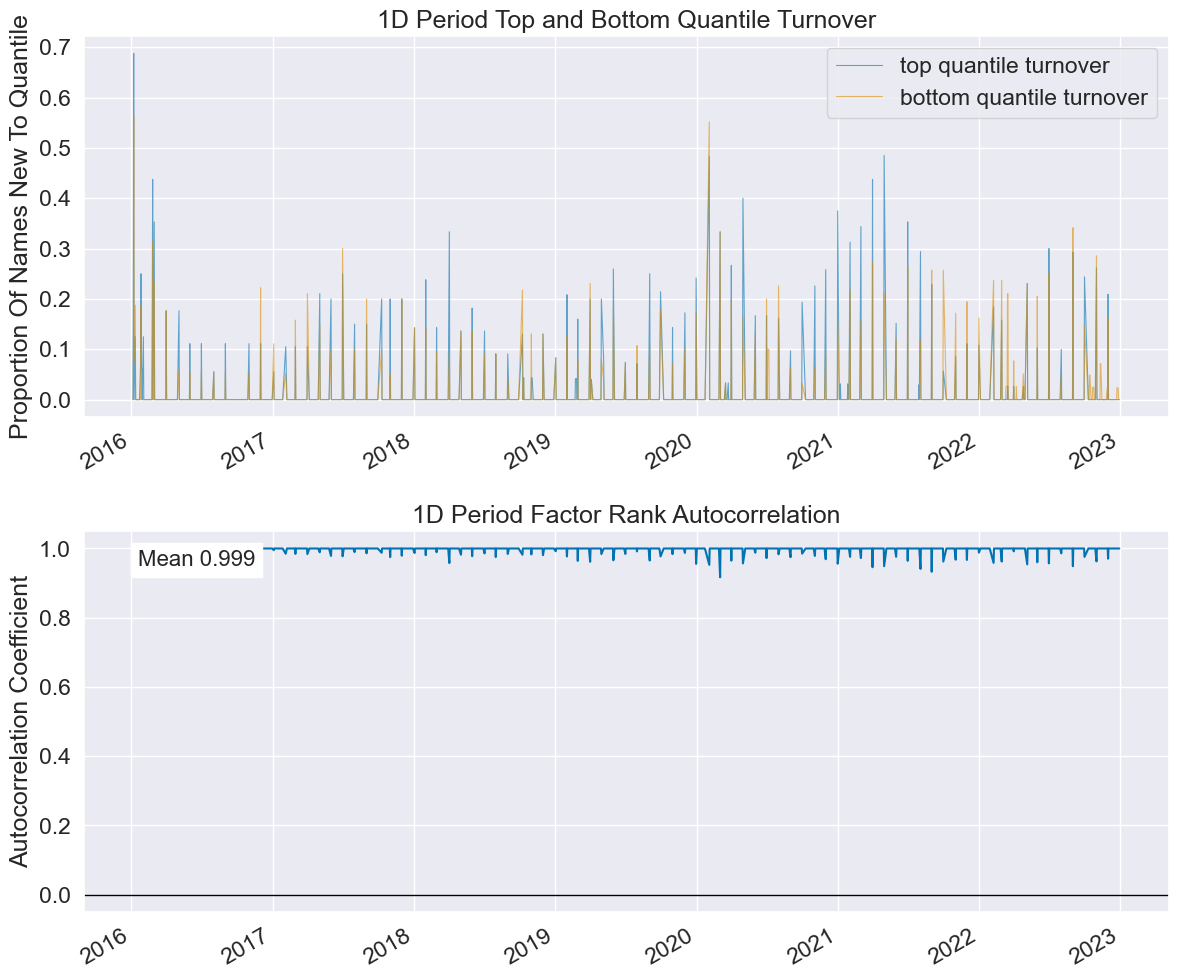

In [28]:
factor_data3= alphalens.utils.get_clean_factor_and_forward_returns(factor,
                                                                    adjnav_4,
                                                                    
                                                                   groupby=None,
                                                                   binning_by_group=False,
                                                                   #quantiles=[0,0.2,1],
                                                                   quantiles=20,    ###################分层回测
                                                                   bins=None,
                                                                   periods=(1,),          # 持仓周期
                                                                   filter_zscore=5,
                                                                   groupby_labels=None,
                                                                   max_loss=1,               # 能容忍的最大缺省值百分比
                                                                   zero_aware=False,
                                                                   cumulative_returns=True)
alphalens.tears.create_full_tear_sheet(factor_data3,long_short=False,
                           group_neutral=False,
                           by_group=False) 